# Wine Quality Classification using KNN model

The K-Nearest Neighbors algorithm is a lazy learning algorithm that iterates through the entire dataset to find classify according to the majority class among the k nearest neighbors.

Importing and preprocessing the dataset

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('WineQT.csv')
df.head()
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [19]:
train, eval = train_test_split(df, test_size=0.2, random_state=42)
train = train.reset_index(drop=True)
eval = eval.reset_index(drop=True)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(train.drop('quality', axis=1))
x_eval_scaled = scaler.transform(eval.drop('quality', axis=1))

x_train = x_train_scaled
y_train = train['quality'].values
x_eval = x_eval_scaled
y_eval = eval['quality'].values

In [21]:
import numpy as np
import matplotlib.pyplot as plt
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, x, y):
        self.x_train = x
        self.y_train = y

    def predict(self, x):
        return np.array([self._predict(xi) for xi in x])
    
    def _predict(self, x):
        dist = [np.linalg.norm(x - x_train) for x_train in self.x_train]
        k_indices = np.argsort(dist)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()

        return most_common


K=3, Error Rate: 0.4716
K=5, Error Rate: 0.4410
K=5, Error Rate: 0.4410
K=7, Error Rate: 0.4410
K=7, Error Rate: 0.4410
K=9, Error Rate: 0.3755
K=9, Error Rate: 0.3755
K=11, Error Rate: 0.3930
K=11, Error Rate: 0.3930
K=13, Error Rate: 0.3799
K=13, Error Rate: 0.3799
K=15, Error Rate: 0.3843
K=15, Error Rate: 0.3843


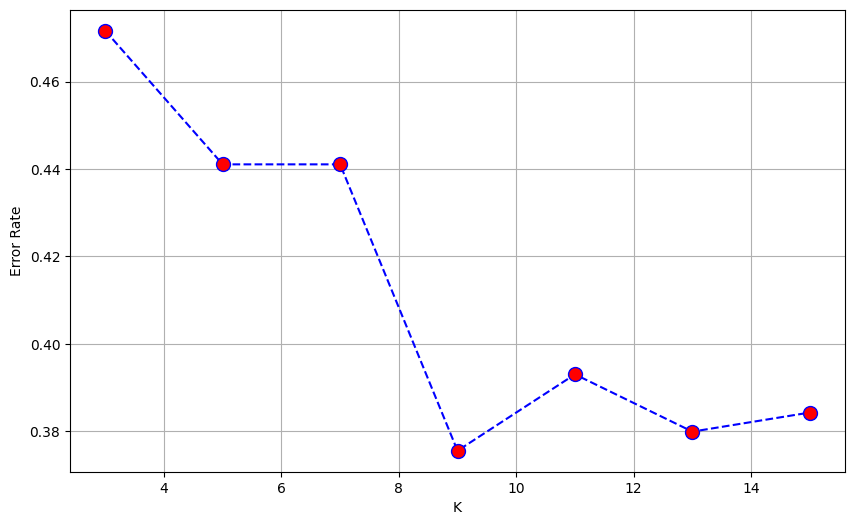

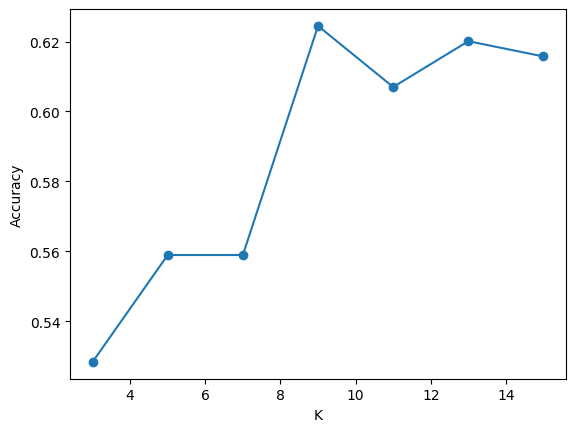

In [25]:
errors = []
accuracies = []
k_values = [3, 5, 7, 9, 11, 13, 15] 

for k in k_values:
    model = KNN(k=k)
    model.fit(x_train, y_train)
    predictions = model.predict(x_eval) 
    
    error = np.mean(predictions != y_eval)
    accuracy = np.mean(predictions == y_eval)
    
    print(f'K={k}, Error Rate: {error:.4f}')
    errors.append(error)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

plt.plot(k_values, accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()
